/home/zhongwei/.local/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/zhongwei/.local/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


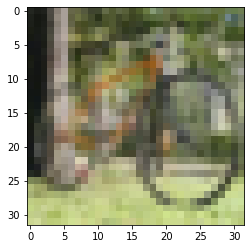

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import torchvision.transforms as transforms
from torch.utils.data import ConcatDataset, DataLoader, Subset, Dataset

fname = "./0_0.png"
img = Image.open(fname)
plt.imshow(img)
plt.show()

In [12]:
class ImageDataset(Dataset):
    def __init__(self, path, tfm, files = None):
        super(ImageDataset).__init__()
        self.path = path
        self.files = sorted([os.path.join(path,x) for x in os.listdir(path) if x.endswith(".png")])
        if files != None:
            self.files = files
        self.transform = tfm

    def __len__(self):
        return len(self.files)
  
    def __getitem__(self,idx):
        fname = self.files[idx] 
        im = Image.open(fname)
        # 32x32
        im = self.transform(im)
        # im = self.data[idx]
        try:
            label = int(fname.split("/")[-1].split("_")[0])
            # print(label)
        except:
            label = -1 # test has no label
            # print(" test has no label")
        return im,label

In [13]:
from torchvision.transforms import ToPILImage
to_pil = ToPILImage()

def showBatchImage(loader, batch_idx, batch_size):
    fig = plt.figure(figsize=(10, 10))
    # figsize 不是 image dimension
    
    for i, batch in enumerate(loader):
        imgs, labels = batch
        if i == batch_idx:
            print("Label:",labels)
            print(labels.shape)
            ## Try transform for all imgs in batch
            for j in range(batch_size):
                img = imgs[j]
                img = to_pil(img)
                fig.add_subplot(1, batch_size, j+1)
                plt.imshow(img)
                plt.imshow(img)

            plt.show()
            break

Label: tensor([10, 46,  0, 49])
torch.Size([4])


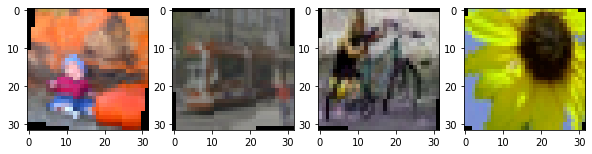

In [15]:
src_path = "./hw1_data/hw1_data/p1_data/train_50"
train_tfm = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.5, hue=0.1),
        transforms.RandomRotation(degrees=(-15,+15)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
])

dataset = ImageDataset(src_path, tfm=train_tfm)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

for idx in range(50):
        showBatchImage(dataloader, batch_idx=idx, batch_size=4)